## 读取数据

In [17]:
import pandas as pd

train_labeled_cn = pd.read_csv('data/raw/cn_train.csv', encoding='utf-8')
dev_cn = pd.read_csv('data/raw/cn_dev.csv', encoding='utf-8')

In [5]:
train_labeled_cn.shape

(12677, 6)

In [6]:
train_labeled_cn.columns

Index(['ID', 'Dialogue_id', 'Utterance_id', 'Speaker', 'Sentence', 'Label'], dtype='object')

In [7]:
train_labeled_cn.head(5)

,ID,Dialogue_id,Utterance_id,Speaker,Sentence,Label
0,0,0,0,卖油条小刘,我说,0
1,1,0,1,保姆小张,干啥子嘛？,0
2,2,0,2,卖油条小刘,你看你往星空看月朦胧，鸟朦胧,1
3,3,0,3,卖油条小刘,咱是不是歇一下这双，疲惫的双腿？,0
4,4,0,4,卖油条小刘,快把我累死了,0


## 标签分布

In [8]:
train_labeled_cn['Label'].value_counts()

0    9031
1    3646
Name: Label, dtype: int64

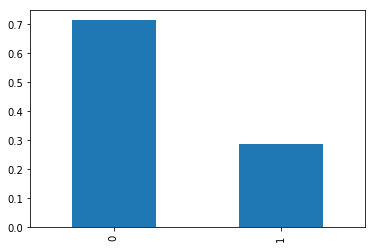

In [10]:
%matplotlib inline
train_labeled_cn['Label'].value_counts(normalize=True).plot(kind='bar');

## 人物数量及标签分布

In [43]:
speaker_labels_mean = dict(train_labeled_cn.groupby("Speaker")['Label'].mean())
# sorted(speaker_labels_mean.items(), key=lambda item: item[1], reverse=True)

In [44]:
speaker_labels_sum = dict(train_labeled_cn.groupby("Speaker")['Label'].sum())
# print(speaker_labels_sum)
# sorted(speaker_labels_sum.items(), key=lambda item: item[1], reverse=True)

In [48]:
from collections import Counter

train_cn_counter = Counter(train_labeled_cn['Speaker'])
dev_cn_counter = Counter(dev_cn['Speaker'])
# print(train_cn_counter)
# print("**********************************************")
print(dev_cn_counter)

Counter({'和平': 418, '傅明': 340, '志国': 224, '志新': 174, '圆圆': 130, '苏苏': 39, '保姆小张': 35, '和平她妈': 35, '于大妈': 27, '李大妈': 25, '燕红': 24, '居委会陈大妈': 23, '季春生': 22, '小凡': 21, '孟朝阳': 21, '保姆小兰': 15, '保姆小桂': 15, '胡三儿': 14, '股东男': 11, '电视台女记者': 6, '老郑': 6, '股东女': 5, '苏苏家保姆': 1, '众人齐声': 1})


In [49]:
speaker_analysis = {}

for (key, value) in speaker_labels_sum.items():
    speaker_analysis[key] = [round(train_cn_counter[key], 3), value, round(speaker_labels_mean[key], 3)]

# print(speaker_analysis)
sorted(speaker_analysis.items(), key=lambda item: item[1][2], reverse=True)

[('电视台摄像', [1, 1, 1.0]),
 ('管道工人', [1, 1, 1.0]),
 ('保姆小兰', [13, 8, 0.615]),
 ('病人甲', [39, 20, 0.513]),
 ('灭鼠办领导', [4, 2, 0.5]),
 ('大个儿', [13, 6, 0.462]),
 ('苏苏爸', [68, 28, 0.412]),
 ('冯导助手', [10, 4, 0.4]),
 ('阿文', [20, 8, 0.4]),
 ('冯导演', [62, 23, 0.371]),
 ('傅明', [2585, 946, 0.366]),
 ('李秘', [25, 9, 0.36]),
 ('季春生', [131, 46, 0.351]),
 ('邻居保姆', [73, 25, 0.342]),
 ('宝财', [112, 38, 0.339]),
 ('王总', [61, 20, 0.328]),
 ('孟朝阳', [401, 131, 0.327]),
 ('居委会陈大妈', [123, 40, 0.325]),
 ('计生办李同志', [22, 7, 0.318]),
 ('卖油条小刘', [19, 6, 0.316]),
 ('大壮', [16, 5, 0.312]),
 ('志新', [1369, 419, 0.306]),
 ('保姆小张', [164, 48, 0.293]),
 ('圆圆', [796, 233, 0.293]),
 ('小芳大妈', [199, 58, 0.291]),
 ('燕红', [247, 72, 0.291]),
 ('胡学范', [126, 36, 0.286]),
 ('病人乙', [25, 7, 0.28]),
 ('老傅远房表姐', [83, 23, 0.277]),
 ('和平', [2549, 703, 0.276]),
 ('杨大夫', [46, 12, 0.261]),
 ('调解阿姨', [23, 6, 0.261]),
 ('小刘媳妇儿', [27, 7, 0.259]),
 ('和平她妈', [105, 27, 0.257]),
 ('胡三儿', [71, 18, 0.254]),
 ('刑警小宋女', [8, 2, 0.25]),
 ('杨晶晶', [8, 2, 0.25])

In [50]:
train_cn_set = set(train_labeled_cn['Speaker'])
dev_cn_set = set(dev_cn['Speaker'])
print("训练集人物个数：", len(train_cn_set))
print("开发集人物个数：", len(dev_cn_set))
print(dev_cn_set - train_cn_set)

训练集人物个数： 76
开发集人物个数： 24
{'股东男', '股东女'}


把训练集中的笑点数为0的speaker全丢到一类：other，开发集中有在训练集中未出现过的speaker就不管了

## 文本长度

In [9]:
train_labeled['Sentence'].str.len().describe()

count    12677.000000
mean        15.119508
std         10.051367
min          1.000000
25%          8.000000
50%         13.000000
75%         20.000000
max        143.000000
Name: Sentence, dtype: float64

## 数据划分

In [11]:
from sklearn.model_selection import train_test_split

dataset = train_labeled[['Dialogue_id', 'Speaker', 'Sentence', 'Label']]
train, valid = train_test_split(dataset, test_size=0.2, stratify=train_labeled['Label'], random_state=1000)
train.to_csv('data/preprocess/cn_train.tsv', index=False, header=False, sep='\t',encoding='utf-8')
valid.to_csv('data/preprocess/cn_dev.tsv', index=False, header=False, sep='\t', encoding='utf-8')

In [12]:
dataset.to_csv('data/preprocess/cn_total.tsv', index=False, header=False, sep='\t', encoding='utf-8')

# 英文

In [1]:
import pandas as pd

train_labeled_en = pd.read_csv('data/raw/en_train.csv', encoding='utf-8')
dev_en = pd.read_csv('data/raw/en_dev.csv', encoding='utf-8')

In [2]:
train_labeled_en.shape

(7472, 6)

In [3]:
train_labeled_en.columns

Index(['ID', 'Dialogue_id', 'Utterance_id', 'Speaker', 'Sentence', 'Label'], dtype='object')

In [4]:
train_labeled_en.head(5)

,ID,Dialogue_id,Utterance_id,Speaker,Sentence,Label
0,0,0,0,Chandler,also I was the point person on my companys tr...,0
1,1,0,1,The Interviewer,You mustve had your hands full.,0
2,2,0,2,Chandler,That I did. That I did.,0
3,3,0,3,The Interviewer,So lets talk a little bit about your duties.,0
4,4,0,4,Chandler,My duties? All right.,1


## 标签分布

In [5]:
train_labeled_en['Label'].value_counts()

0    5699
1    1773
Name: Label, dtype: int64

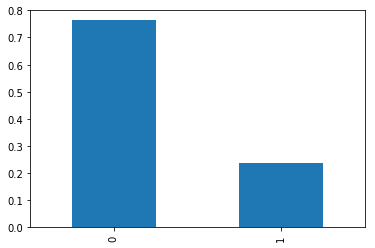

In [6]:
%matplotlib inline
train_labeled_en['Label'].value_counts(normalize=True).plot(kind='bar');

## 人物数量及标签分布

In [57]:
speaker_en_labels_mean = dict(train_labeled_en.groupby("Speaker")['Label'].mean())
# sorted(speaker_labels_mean.items(), key=lambda item: item[1], reverse=True)

In [58]:
speaker_en_labels_sum = dict(train_labeled_en.groupby("Speaker")['Label'].sum())
# print(speaker_labels_sum)
# sorted(speaker_labels_sum.items(), key=lambda item: item[1], reverse=True)

In [59]:
from collections import Counter

train_en_counter = Counter(train_labeled_en['Speaker'])
dev_en_counter = Counter(dev_en['Speaker'])
# print(train_cn_counter)
# print("**********************************************")
print(dev_en_counter)

Counter({'Ross': 182, 'Phoebe': 145, 'Rachel': 143, 'Joey': 126, 'Monica': 107, 'Chandler': 82, 'Frank': 17, 'Carol': 10, 'All': 8, 'Susan': 8, 'Dr. Long': 8, 'Joanna': 7, 'Tag': 7, 'Bob': 5, 'Max': 5, 'Woman': 4, 'Whitney': 4, 'Kori': 4, 'Jen': 4, 'Janine': 4, 'Lauren': 4, 'Estelle': 4, 'Alice': 3, 'Kyle': 3, 'The Hot Girl': 3, 'Ross and Rachel': 3, 'Guy': 2, 'Gary': 2, 'Dr. Harad': 2, 'TV Announcer': 2, 'Mrs. Green': 1, 'Cookie': 1, 'Monica and Rachel': 1, 'Stage Manager': 1, 'Kate': 1, 'Doctor': 1})


In [60]:
speaker_analysis_en = {}

for (key, value) in speaker_en_labels_sum.items():
    speaker_analysis_en[key] = [round(train_en_counter[key], 3), value, round(speaker_en_labels_mean[key], 3)]

# print(speaker_analysis)
sorted(speaker_analysis_en.items(), key=lambda item: item[1][2], reverse=True)

[('A Student', [1, 1, 1.0]),
 ('Another Tour Guide', [1, 1, 1.0]),
 ('Emeril', [1, 1, 1.0]),
 ('Fireman No. 2', [2, 2, 1.0]),
 ('Gary Collins', [1, 1, 1.0]),
 ('Hold Voice', [1, 1, 1.0]),
 ('Janitor', [1, 1, 1.0]),
 ('Message', [1, 1, 1.0]),
 ('Mrs. Waltham', [1, 1, 1.0]),
 ('Peter', [1, 1, 1.0]),
 ('Phoebe and Rachel', [1, 1, 1.0]),
 ('Professore Clerk', [1, 1, 1.0]),
 ('Rachel and Phoebe', [1, 1, 1.0]),
 ('The Singing Man', [2, 2, 1.0]),
 ('Tour Guide', [1, 1, 1.0]),
 ('Voice', [2, 2, 1.0]),
 ('Wayne', [1, 1, 1.0]),
 ('Mr. Heckles', [9, 7, 0.778]),
 ('Bobby', [4, 3, 0.75]),
 ('Alice', [3, 2, 0.667]),
 ('Director', [3, 2, 0.667]),
 ('Hotel Clerk', [3, 2, 0.667]),
 ('The Food Critic', [3, 2, 0.667]),
 ('Ticket Counter Attendant', [3, 2, 0.667]),
 ('Gunther', [14, 9, 0.643]),
 ('The Director', [7, 4, 0.571]),
 ('Paul', [13, 7, 0.538]),
 ('Airline Employee', [2, 1, 0.5]),
 ('Another Scientist', [2, 1, 0.5]),
 ('Bonnie', [4, 2, 0.5]),
 ('Carl', [2, 1, 0.5]),
 ('Dr. Rhodes', [2, 1, 0.5]),


In [7]:
train_en_set = set(train_labeled_en['Speaker'])
dev_en_set = set(dev_en['Speaker'])
print("训练集人物个数：", len(train_en_set))
print("开发集人物个数：", len(dev_en_set))
print(dev_en_set - train_en_set)

训练集人物个数： 215
开发集人物个数： 36
{'TV Announcer', 'Doctor', 'Monica and Rachel', 'Cookie', 'Stage Manager', 'Lauren', 'The Hot Girl', 'Jen', 'Estelle', 'Whitney', 'Kori', 'Ross and Rachel', 'Dr. Harad', 'Max'}


## 文本长度

In [36]:
train_labeled_en['Sentence'].apply(lambda x : len(str(x).split(" "))).describe()

count    7472.000000
mean        8.019540
std         6.346561
min         1.000000
25%         3.000000
50%         6.000000
75%        11.000000
max        69.000000
Name: Sentence, dtype: float64

## 数据划分

In [16]:
from sklearn.model_selection import train_test_split

dataset = train_labeled_en[['Dialogue_id', 'Speaker', 'Sentence', 'Label']]
train, valid = train_test_split(dataset, test_size=0.2, stratify=train_labeled['Label'], random_state=1000)
train.to_csv('data/preprocess/en_train.tsv', index=False, header=False, sep='\t',encoding='utf-8')
valid.to_csv('data/preprocess/en_dev.tsv', index=False, header=False, sep='\t', encoding='utf-8')

In [17]:
dataset.to_csv('data/preprocess/en_total.tsv', index=False, header=False, sep='\t', encoding='utf-8')

In [8]:
import pandas as pd
train_labeled_en = pd.read_csv('data/raw/cn_dev.csv', encoding='utf-8')

In [9]:
train_labeled_en.shape

(1632, 5)

In [10]:
train_labeled_en.columns

Index(['ID', 'Dialogue_id', 'Utterance_id', 'Speaker', 'Sentence'], dtype='object')

In [11]:
train_labeled_en.head(5)

,ID,Dialogue_id,Utterance_id,Speaker,Sentence
0,0,0,0,和平,唉 李大妈您走错了，客厅挨那边儿
1,1,0,1,李大妈,没错，我这儿多少年老习惯了见天早起，我就要挨屋擦一遍不擦呀心里头膈应
2,2,0,2,志国,那您挨这屋晃您不怕我们心里膈应呀您
3,3,0,3,李大妈,不碍的！
4,4,0,4,李大妈,咱明媒正娶，怕谁呀！踏踏实实的


In [12]:
train_labeled_en['Sentence'].apply(lambda x : len(str(x).split(" "))).describe()

count    1632.000000
mean        1.178922
std         0.572063
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         7.000000
Name: Sentence, dtype: float64

In [13]:
dataset = train_labeled_en[['Dialogue_id', 'Speaker', 'Sentence']]
dataset.to_csv('data/preprocess/cn_test.tsv', index=False, header=False, sep='\t', encoding='utf-8')